In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
np.random.seed(42)

n = 200

df = pd.DataFrame({
    "Age": np.random.randint(18, 65, size=n),
    "Salary": np.random.randint(20_000, 120_000, size=n),
    "Experience": np.random.randint(0, 40, size=n),
    "Department": np.random.choice(["IT", "HR", "Finance", "Marketing"], size=n)
})

In [5]:
df.head()

,Age,Salary,Experience,Department
0,56,72733,35,IT
1,46,85318,19,IT
2,32,109474,0,HR
3,60,43664,7,Finance
4,25,87172,15,Marketing


In [6]:
summary = df.groupby("Department").agg(
    mean_salary=("Salary", "mean"),
    median_age=("Age", "median"),
    std_experience=("Experience", "std")
)

In [7]:
summary

,mean_salary,median_age,std_experience
Department,,,
Finance,62865.209302,44.0,11.721009
HR,73527.636364,46.0,11.892578
IT,66711.925373,43.0,11.330486
Marketing,68845.456522,39.5,10.546149


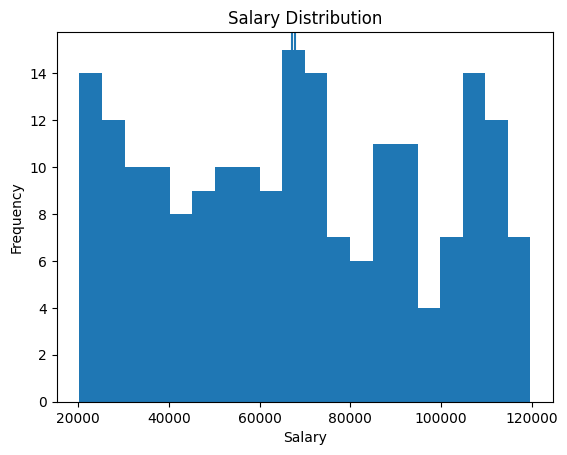

In [8]:
mean_salary = df["Salary"].mean()
median_salary = df["Salary"].median()

plt.figure()
plt.hist(df["Salary"], bins=20)
plt.axvline(mean_salary)
plt.axvline(median_salary)
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

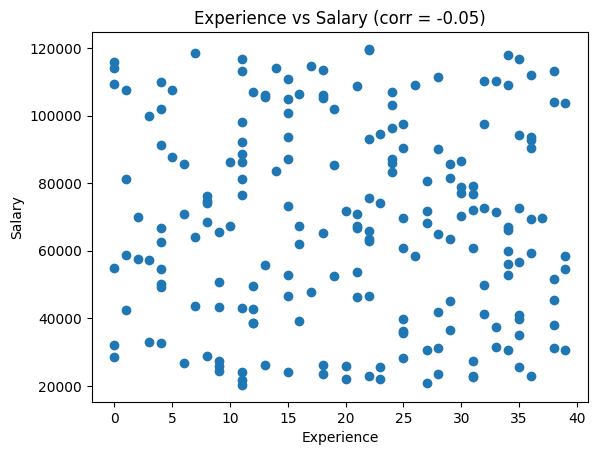

In [10]:
corr = np.corrcoef(df["Experience"], df["Salary"])[0, 1]

plt.figure()
plt.scatter(df["Experience"], df["Salary"])
plt.title(f"Experience vs Salary (corr = {corr:.2f})")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()


In [12]:
df["Salary_per_YearExp"] = np.where(
    df["Experience"] > 0,
    df["Salary"] / df["Experience"],
    np.nan
)

df.head()

,Age,Salary,Experience,Department,Salart_per_YearExp,Salary_per_YearExp
0,56,72733,35,IT,2078.085714,2078.085714
1,46,85318,19,IT,4490.421053,4490.421053
2,32,109474,0,HR,NaN,NaN
3,60,43664,7,Finance,6237.714286,6237.714286
4,25,87172,15,Marketing,5811.466667,5811.466667


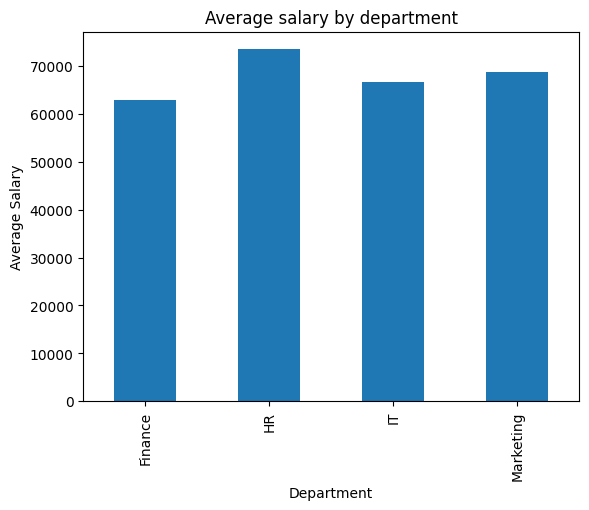

In [13]:
dept_salary = df.groupby("Department")["Salary"].mean()

plt.figure()
dept_salary.plot(kind="bar")
plt.title("Average salary by department")
plt.ylabel("Average Salary")
plt.show()

In [14]:
salary_mean = df["Salary"].mean()
salary_std = df["Salary"].std()

z_scores = (df["Salary"] - salary_mean) / salary_std

outliers = df[np.abs(z_scores) > 3]

len(outliers)

0

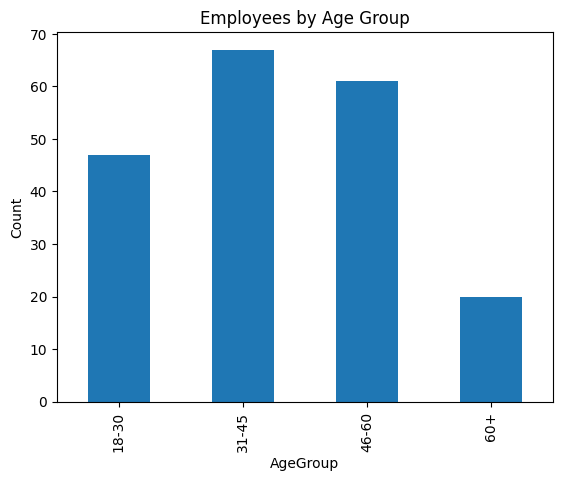

In [15]:
bins = [18, 30, 45, 60, 100]
labels = ["18-30", "31-45", "46-60", "60+"]

df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels)

age_counts = df["AgeGroup"].value_counts().sort_index()

plt.figure()
age_counts.plot(kind="bar")
plt.title("Employees by Age Group")
plt.ylabel("Count")
plt.show()

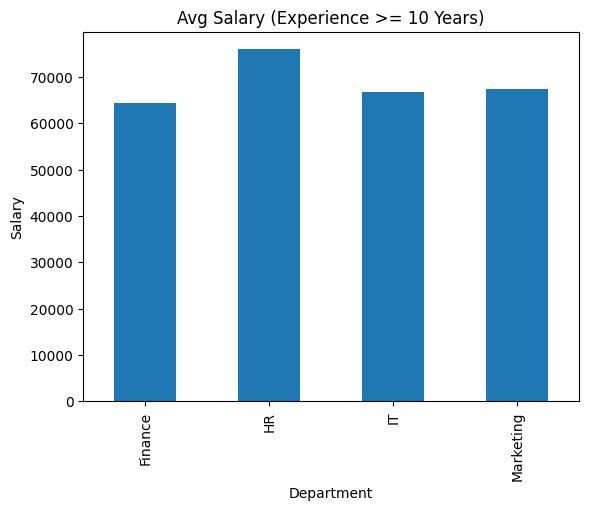

In [18]:
experienced = df[df["Experience"] >= 10]

avg_salary_exp = experienced.groupby("Department")["Salary"].mean()

plt.figure()
avg_salary_exp.plot(kind="bar")
plt.title("Avg Salary (Experience >= 10 Years)")
plt.ylabel("Salary")
plt.show()

In [19]:
for col in ["Age", "Salary", "Experience"]:
    min_val = df[col].min()
    max_val = df[col].max()
    df[col + "_norm"] = (df[col] - min_val) / (max_val - min_val)

df[["Age_norm", "Salary_norm", "Experience_norm"]].describe()

,Age_norm,Salary_norm,Experience_norm
count,200.000000,200.000000,200.000000
mean,0.512391,0.478554,0.520513
std,0.298164,0.294297,0.291334
min,0.000000,0.000000,0.000000
25%,0.260870,0.224339,0.282051
50%,0.521739,0.472046,0.538462
75%,0.782609,0.723595,0.775641
max,1.000000,1.000000,1.000000


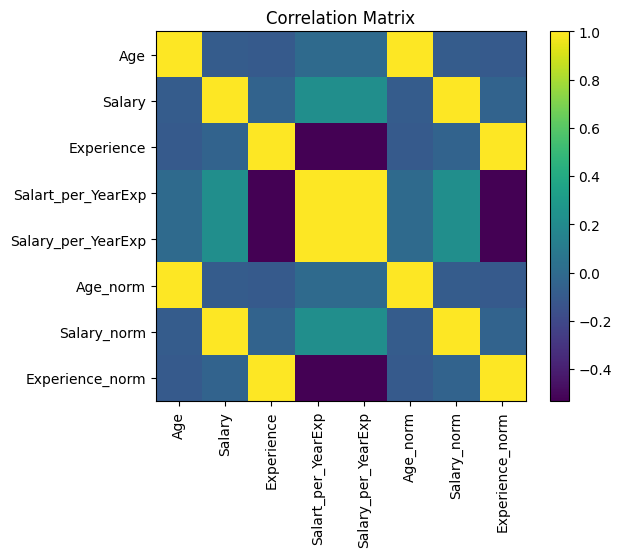

In [20]:
numeric_df = df.select_dtypes(include=np.number)
corr_matrix = numeric_df.corr()

plt.figure()
plt.imshow(corr_matrix)
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Correlation Matrix")
plt.colorbar()
plt.show()